In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

%matplotlib inline

Using TensorFlow backend.


In [35]:
class AE():
    def __init__(self, optimizer='rmsprop', loss='mean_squared_error', input_data_path="../4x4matrix.csv"):
        self.p_matrix = np.load("4x4matrix.npz")["p_matrix"]
        self.q_matrix = np.load("4x4matrix.npz")["q_matrix"]
        self.optimizer = optimizer
        self.model = Sequential()
        self.model.add( Dense(16, activation = 'relu', input_dim = 9) )
        self.model.add( Dense(16, activation = 'relu') )
        #self.model.add( Dense(16, activation = 'hard_sigmoid') )
        self.model.add( Dropout(0.2) )
        self.model.add( Dense(16, activation = 'relu') )
        self.model.add( Dropout(0.2) )
        self.model.add( Dense(16, activation = 'relu') )
        self.model.add( Dropout(0.2) )
        self.model.add( Dense(16, activation = 'relu') )
        #self.model.add( Dense(16, activation = keras.layers.ReLU(max_value=1, negative_slope=0, threshold = 0)) )
        #self.model.add( Dense(16, activation = keras.layers.ReLU(max_value=1, negative_slope=0, threshold = 0)) )
        self.model.compile(optimizer = optimizer,
                           loss = loss,
                           metrics = ['accuracy'])
        
    def fit(self, epochs='4', batch_size='256'):
        self.model.fit(self.q_matrix, self.p_matrix,
                      epochs = epochs,
                      batch_size = batch_size,
                      validation_data = (self.q_matrix, self.p_matrix))
    
    def predict(self, test_img):
        self.preds = self.model.predict(test_img).reshape(4,4)
        self.preds_binary = self.preds.copy()
        self.preds_binary[self.preds_binary < 0.5] = 0
        self.preds_binary[self.preds_binary >= 0.5] = 1
        print(self.preds, self.preds_binary)
        self.fig, self.axes = plt.subplots(nrows = 1, ncols = 3, figsize = (14,14))
        self.axes[0].imshow(test_img.reshape(3,3), cmap = plt.cm.binary)
        self.axes[0].set_title("original image")
        self.axes[1].imshow(self.preds, cmap = plt.cm.binary)
        self.axes[1].set_title("predicted image")
        self.axes[2].imshow(self.preds_binary, cmap = plt.cm.binary)
        self.axes[2].set_title("predicted image with binalization")

In [36]:
autoencoder = AE("rmsprop", "mean_squared_error")

In [37]:
autoencoder.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                160       
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_8 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_9 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
__________

In [38]:
autoencoder.fit(epochs = 5, batch_size=256)

Train on 5308416 samples, validate on 5308416 samples
Epoch 1/5
5308416/5308416 [==============================] - 94s 18us/step - loss: 0.2299 - acc: 0.0561 - val_loss: 0.2186 - val_acc: 0.0599
Epoch 2/5
5308416/5308416 [==============================] - 98s 19us/step - loss: 0.2264 - acc: 0.0601 - val_loss: 0.2177 - val_acc: 0.0418
Epoch 3/5
5308416/5308416 [==============================] - 92s 17us/step - loss: 0.2263 - acc: 0.0600 - val_loss: 0.2176 - val_acc: 0.0363
Epoch 4/5
5308416/5308416 [==============================] - 102s 19us/step - loss: 0.2263 - acc: 0.0574 - val_loss: 0.2176 - val_acc: 0.0447
Epoch 5/5
5308416/5308416 [==============================] - 100s 19us/step - loss: 0.2264 - acc: 0.0661 - val_loss: 0.2180 - val_acc: 0.0652


[[0.67572707 0.77227473 0.4825897  0.38194472]
 [0.5099146  0.5764384  0.2957374  0.2331096 ]
 [0.4793204  0.51600266 0.5018861  0.4665229 ]
 [0.65186787 0.70661414 0.67517287 0.6228017 ]] [[1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 1. 1. 0.]
 [1. 1. 1. 1.]]


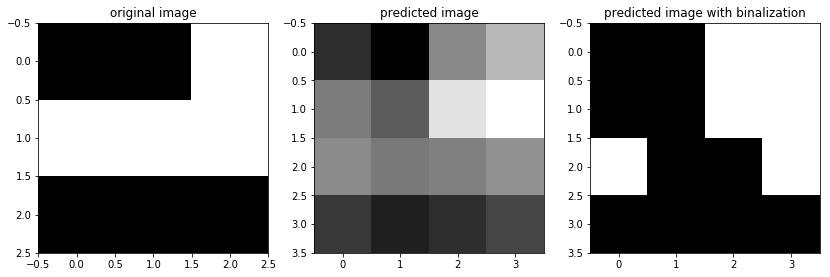

In [44]:
test_img = np.array([[1,1,0,0,0,0,1,1,1]])
autoencoder.predict(test_img)

In [48]:
_all = np.all(autoencoder.q_matrix == test_img, axis = 1)

In [32]:
_all = np.where(_all == True)

In [37]:
p_given_q = autoencoder.p_matrix[_all]

([array([1106.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1551.]),
  array([ 903.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1754.]),
  array([ 845.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1812.]),
  array([1054.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1603.]),
  array([ 401.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         2256.]),
  array([ 126.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         2531.]),
  array([ 248.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         2409.]),
  array([ 785.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1872.]),
  array([1387.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1270.]),
  array([1968.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          689.]),
  array([ 944.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1713.]),
  array([ 

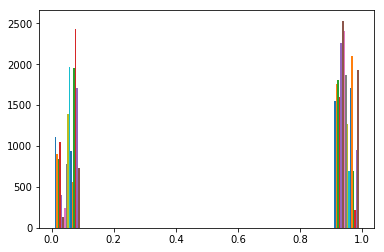

In [38]:
plt.figure()
plt.hist(p_given_q)

([array([1106.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1551.]),
  array([ 903.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1754.]),
  array([ 845.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1812.]),
  array([1054.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1603.]),
  array([ 401.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         2256.]),
  array([ 126.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         2531.]),
  array([ 248.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         2409.]),
  array([ 785.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1872.]),
  array([1387.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1270.]),
  array([1968.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          689.]),
  array([ 944.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1713.]),
  array([ 

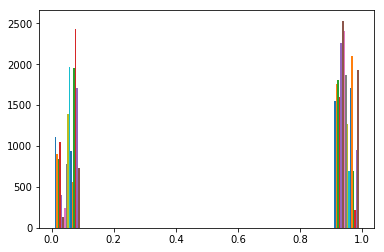

In [47]:
test_data = ['a', 'b', 'a']
plt.figure()
plt.hist(p_given_q)

In [40]:
p_given_q

array([[0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 1., 1.]])